<a href="https://colab.research.google.com/github/Abrahammar997/numerico-invierno-2021/blob/main/Ray_solucion_persoonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
C = np.array(
    [
     [2,2],
     [3,3],
     [4,3],
     [5,3],
     [5,4],
     [5,5],
     [4,5],
     [3,6],
     [2,6],
     [2,7],
     [3,8],
     [4,9],
     [5,9],
     [6,9],
     [7,9],
     [8,8],
     [8,7],
     [7,7],
     [6,7],
     [5,7],
     [4,7],
     [5,6],
     [6,6],
     [6,5],
     [6,4],
     [6,3],
     [6,2],
     [5,2],
     [4,2],
     [3,2]
    ]
)

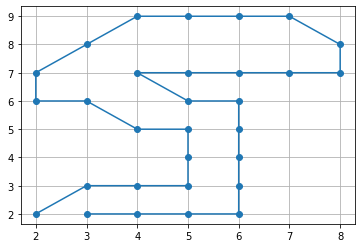

In [3]:
plt.plot(C[:,0],C[:,1],'o-')
plt.grid()
plt.show()

In [4]:
def theta(v1,v2):
  return np.arccos((v1@v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

def CalcDominioDePuntos(C):
  '''
  Input: Una curva

  Output: Una lista de tuplas del tamaño de vecindad a la izquierda (l) y a la derecha (k)
  '''
  output = []

  n=C.shape[0]

  #Para cada punto
  for i in range(n):
    info_vecindad = [0,0] #(l,d)

    #Para el brazo derecho
    Ri = C[(i+1) % n,:]-C[i,:]
    j=2
    #Lo cambiamos porque en el documento empieza en j=2 en vez de 1
    cond1 = False
    cond2 = False
    while(not(cond1 and cond2)):
        Rij = C[(i+j) % n,:]-C[i,:]
        Rijmenos1 = C[((i+j)-1)% n ,:]-C[i,:]
        Rijmas1 = C[((i+j)+1) % n,:]-C[i,:]
            
        tethaj = theta(Rij,Ri)
        tethajmenos1 = theta(Rijmenos1,Ri)
        tethajmas1 = theta(Rijmas1,Ri)
            
        cond1 = tethajmenos1 < tethaj #bool
        cond2 = tethaj <= tethajmas1
        k = j
        j += 1
    info_vecindad[1] = k

    #Para el brazo izq
    Li = C[i-1,:]-C[i,:]
    j=2 
    cond1 = False
    cond2 = False
    while(not(cond1 and cond2)):
        Lij = C[i-j,:]-C[i,:]
        Lijmenos1 = C[i-j-1,:]-C[i,:]
        Lijmas1 = C[i-j+1,:]-C[i,:]
        
        tethaj = theta(Lij,Li)
        tethajmenos1 = theta(Lijmenos1,Li)
        tethajmas1 = theta(Lijmas1,Li)
        
        cond1 = tethajmas1 < tethaj #bool
        cond2 = tethaj <= tethajmenos1
        l = j
        j += 1
    info_vecindad[0] = l
    output.append(info_vecindad)
  return np.array(output)

In [5]:
CalcDominioDePuntos(C)

array([[5, 2],
       [2, 3],
       [2, 2],
       [3, 3],
       [2, 2],
       [3, 4],
       [2, 4],
       [4, 2],
       [4, 2],
       [2, 3],
       [2, 2],
       [3, 4],
       [2, 3],
       [3, 2],
       [4, 2],
       [2, 2],
       [2, 5],
       [2, 4],
       [3, 3],
       [4, 2],
       [5, 4],
       [2, 2],
       [2, 5],
       [2, 4],
       [3, 3],
       [4, 2],
       [5, 5],
       [2, 4],
       [3, 3],
       [4, 2]])

In [8]:
def DetectionOfDominantPoints(C,Vecindad_info):
  '''
  Input: (una curva (C), la vecindad de cada punto)
  Output: C2 una curva depurada
  '''
  n=C.shape[0]

  cos_ilk = []

  eliminados = np.array([])
  for i in range(n):
    #Step 1
    aik = C[(i+Vecindad_info[i,1]) % n,:]-C[i,:]
    bil = C[(i-Vecindad_info[i,0]) % n,:]-C[i,:]
    #Step 2
    cos_ilk.append(
        (aik@bil)/(np.linalg.norm(aik)*np.linalg.norm(bil))
    )
  cos_ilk = np.array(cos_ilk)
  #Step 3
  eliminados_1 = np.arange(n)[cos_ilk <= -0.8]
  #Step 2
  puntos_dominantes_1, = argrelextrema(cos_ilk, np.greater)
  if (cos_ilk[0]>cos_ilk[1]) & (cos_ilk[0]>cos_ilk[-1]):
    puntos_dominantes_1 = np.concatenate(
        (np.array([0]),puntos_dominantes_1)
    )
  if (cos_ilk[-1]>cos_ilk[0]) & (cos_ilk[0]>cos_ilk[-2]):
    puntos_dominantes_1 = np.concatenate(
        (puntos_dominantes_1,np.array([-1]))
    )
  #Step 4
  sucesive_points = []
  for i in puntos_dominantes_1:
    if (i+1)%n in puntos_dominantes_1:
      if Vecindad_info[i,:].sum() >= Vecindad_info[(i+1)%n,:].sum():
        sucesive_points.append(int(i))
      else:
        sucesive_points.append(int((i+1)%n))
  puntos_dominantes_2 = np.delete(puntos_dominantes_1, sucesive_points)
  eliminados_2 = np.delete(np.arange(n), puntos_dominantes_2)
  eliminados = np.concatenate(
      (eliminados_1, eliminados_2)
  )
  #Step 6
  return np.delete(C,eliminados,axis=0)


In [9]:
parte1 = CalcDominioDePuntos(C)
parte2 = DetectionOfDominantPoints(C,parte1)

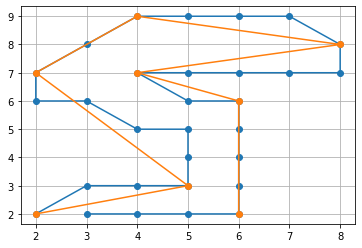

In [10]:
plt.plot(C[:,0],C[:,1],'o-')
plt.plot(parte2[:,0],parte2[:,1],'o-')
plt.grid()
plt.show()